# Clasificación con Regresión Logística

Modelo de clasificación utilizando regresión logística sobre datos de desempeño en partidas.

In [2]:
# 📥 Subir archivo desde tu equipo (funciona en Google Colab)
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['datos_exportados.csv']))

Saving datos_exportados.csv to datos_exportados.csv


In [ ]:
# 🔍 Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# ✅ Selección de variables
features = ['TimeAlive', 'TravelledDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']
target = 'Survived'

X = df[features]
y = df[target]

# 🔀 Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# ⚖️ Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 🤖 Entrenamiento del modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# 🎯 Predicción
y_pred = model.predict(X_test_scaled)

In [ ]:
# 📊 Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 0.64537928704173

Matriz de Confusión:
[[2633  699]
 [1400 1187]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.65      0.79      0.72      3332
           1       0.63      0.46      0.53      2587

    accuracy                           0.65      5919
   macro avg       0.64      0.62      0.62      5919
weighted avg       0.64      0.65      0.63      5919



In [ ]:
# 📊 Validación cruzada con 5 particiones
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_model = LogisticRegression(max_iter=1000, random_state=42)

cv_scores = cross_val_score(log_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("📊 Validación cruzada (5 folds):")
print("Scores por fold:", cv_scores)
print("Promedio de accuracy:", cv_scores.mean())
print("Desviación estándar:", cv_scores.std())


📊 Validación cruzada (5 folds):
Scores por fold: [0.64287223 0.64223865 0.64139388 0.65047518 0.63920575]
Promedio de accuracy: 0.6432371364623303
Desviación estándar: 0.00382542032566876


In [ ]:
# 🔧 Ajuste de hiperparámetros con GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'saga']
}

log = LogisticRegression(max_iter=1000, random_state=42)

grid_search = GridSearchCV(log, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_log = grid_search.best_estimator_
y_pred_log = best_log.predict(X_test_scaled)

print("✅ Mejores parámetros:", grid_search.best_params_)
print("🔍 Accuracy:", accuracy_score(y_test, y_pred_log))
print("\n📉 Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_log))
print("\n📋 Reporte de Clasificación:\n", classification_report(y_test, y_pred_log))


✅ Mejores parámetros: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
🔍 Accuracy: 0.6458861294137523

📉 Matriz de Confusión:
 [[2644  688]
 [1408 1179]]

📋 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.65      0.79      0.72      3332
           1       0.63      0.46      0.53      2587

    accuracy                           0.65      5919
   macro avg       0.64      0.62      0.62      5919
weighted avg       0.64      0.65      0.63      5919



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


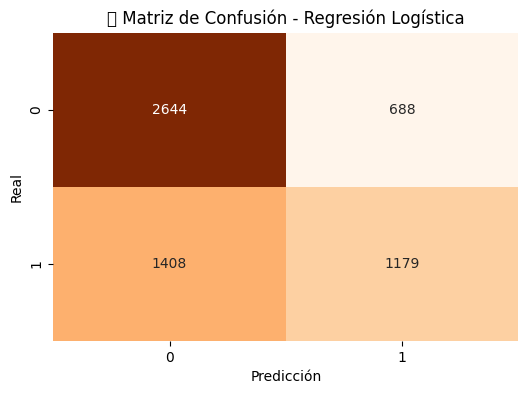

In [ ]:
# 📊 Visualización de matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title("🔍 Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


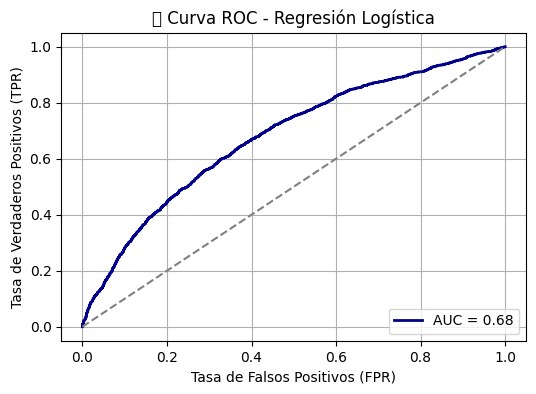

In [ ]:
# 📈 Curva ROC y AUC
from sklearn.metrics import roc_curve, auc

y_prob_log = best_log.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkblue', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('📈 Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


###🧠 Conclusión del Modelo
🔎 Precisión global (accuracy) del modelo es 0.645, lo que significa que clasifica correctamente aproximadamente el 64.5% de los casos.

🧮 Matriz de Confusión:

Clase 0: El modelo la predice relativamente bien (Recall = 0.79).

Clase 1: Bajo desempeño (Recall = 0.46), lo que indica que más de la mitad de los positivos reales se están clasificando mal.

⚠️ Desbalance de desempeño: El modelo favorece la clase 0. Aunque tiene mejor recall en esa clase, la clase 1 está siendo subestimada, lo que podría ser problemático si es una clase importante (por ejemplo, si representa un evento crítico como "no sobrevivir").

📉 Macro F1-score: 0.62, sugiere un desempeño moderado en ambos grupos, pero mejorable.